In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from umibato import Umibato
import pandas as pd

## Reading Quantitative Microbiota Profiles (QMPs) and metadata

In [2]:
qmps = pd.read_csv('../data/toy/x.tsv', delimiter='\t', index_col=0)
qmps.columns = qmps.columns.astype(str)

You may have to arrange your QMPs when your QMPs have many different microbes.

Here, you take some major microbes based on relative abundance.

In [3]:
normalized_qmps = qmps.apply(lambda x: x/x.sum(), axis=0)
qmps = qmps.loc[normalized_qmps.mean(1)>0.0001, :]

In [4]:
qmps

,sample0,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10,sample11,sample12,sample13,sample14,sample15,sample16,sample17,sample18,sample19
0,1.036332,0.711397,0.507898,0.346475,0.245520,0.173965,0.120639,0.082162,0.056297,0.039956,0.025484,0.019078,0.014471,0.010422,0.007463,0.005069,0.003434,0.002250,0.001435,0.000880
1,1.252489,1.291804,1.341614,1.424020,1.418440,1.468109,1.412349,1.330042,1.225610,1.115155,0.857924,0.880981,0.889097,0.945360,0.947576,0.980778,1.027557,1.103433,1.153270,1.262352
2,0.170703,0.226889,0.307489,0.427816,0.569917,0.780022,1.033888,1.293171,1.552929,1.763685,0.775245,0.877252,0.990123,1.104990,1.192746,1.313620,1.381835,1.458749,1.529028,1.631704
3,0.069780,0.082109,0.096244,0.122401,0.160150,0.203489,0.274843,0.372042,0.496938,0.671507,0.165143,0.218711,0.289152,0.388331,0.526121,0.716629,0.976831,1.319921,1.825005,2.399810
4,0.285398,0.309606,0.336677,0.366842,0.410192,0.450471,0.519147,0.576674,0.644183,0.716997,0.902122,1.039559,1.175284,1.328468,1.464660,1.627025,1.748462,1.799941,1.787134,1.726783


You also have to read metadata.

In [5]:
metadata = pd.read_csv('../data/toy/metadata.tsv', delimiter='\t', index_col=0)
metadata.index = metadata.index.astype(str)

Metadata used in Umibato must have two columns whose names are "subjectID" and "timepoint."

The "subjectID" column indicates independent series.

The "timepoint" column indicates the time of each sample.

Any row names are acceptable, but duplication must be avoided. 

In [6]:
metadata

,subjectID,timepoint
sampleID,,
sample0,0,0.0
sample1,0,0.1
sample2,0,0.2
sample3,0,0.3
sample4,0,0.4
sample5,0,0.5
sample6,0,0.6
sample7,0,0.7
sample8,0,0.8


***The QMPs column name and the metadata index name must match.***

## Performing Umibato

You need to set experimental conditions.

In [7]:
obj = Umibato(k_min=1, k_max=3, k_step=1,
              n_init=10, n_jobs=1,
              x_standardization=True,
              est_y_var=True,
              max_iter=100, tol=1e-4,
              output_path='../output/toy')

Here, these settings are same as the paper. Details for options are described in README.md.

Now, you can perform Umibato. Try performing the ```fit``` method.

In [9]:
obj.fit(qmps, metadata)

Fitting Gaussian process regression...



Fitting continuous-time regression hidden Markov model...


## Visualizing the results by Umibato

You can visualize the results easily. 

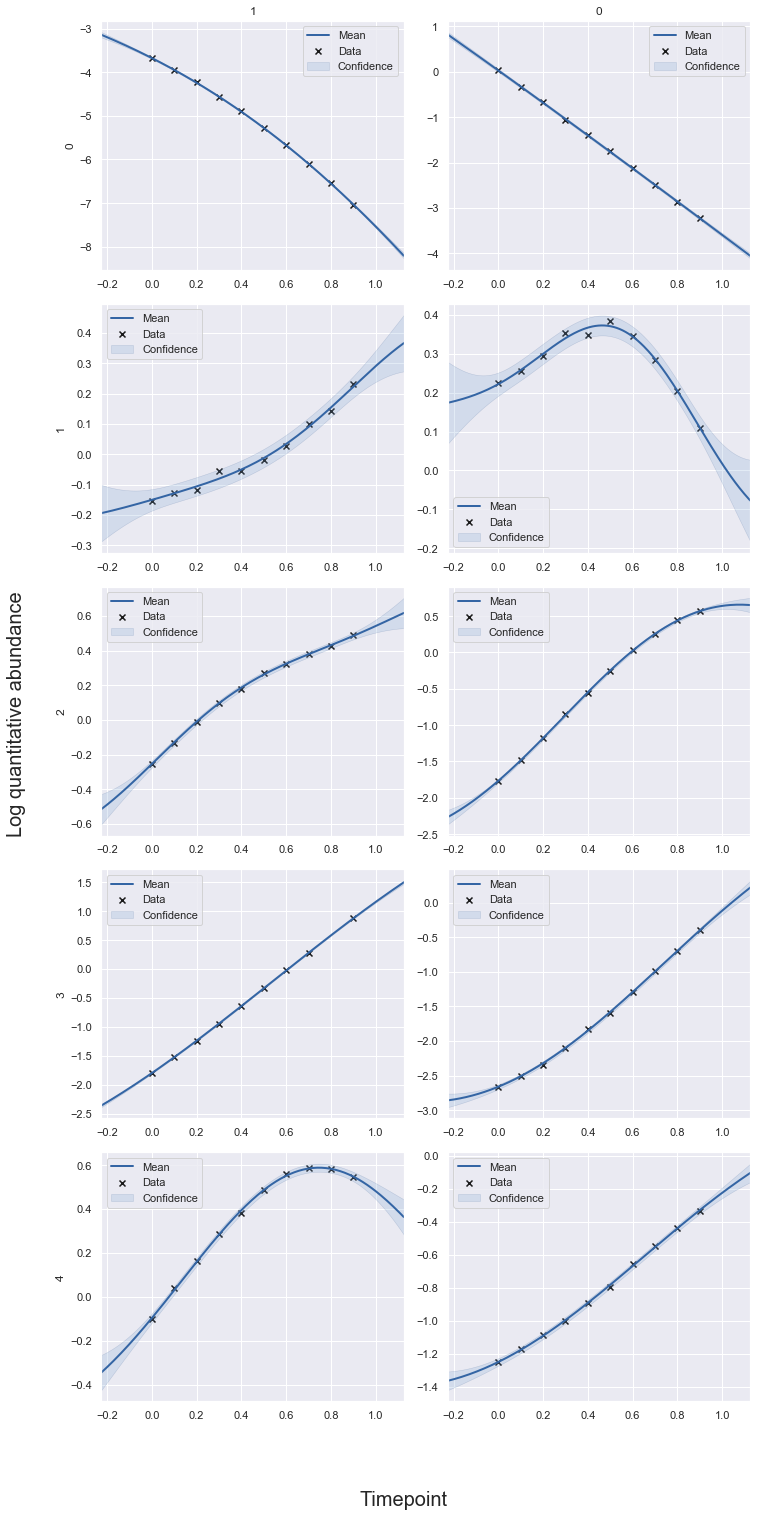

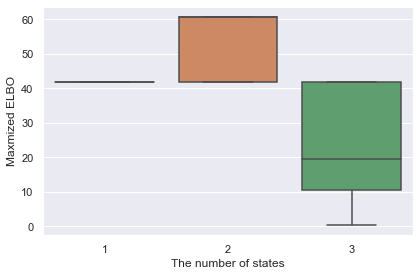

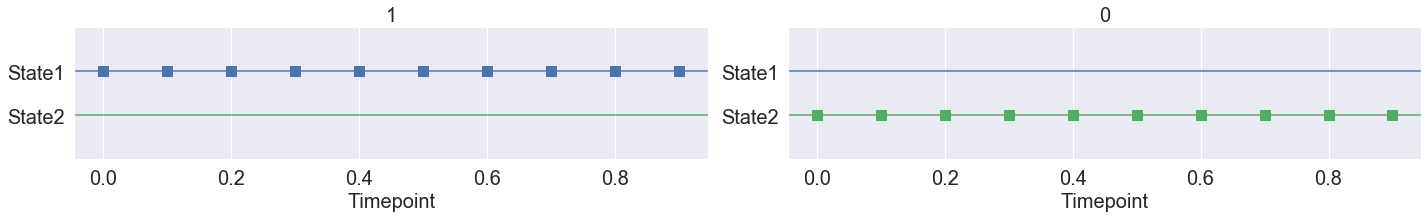

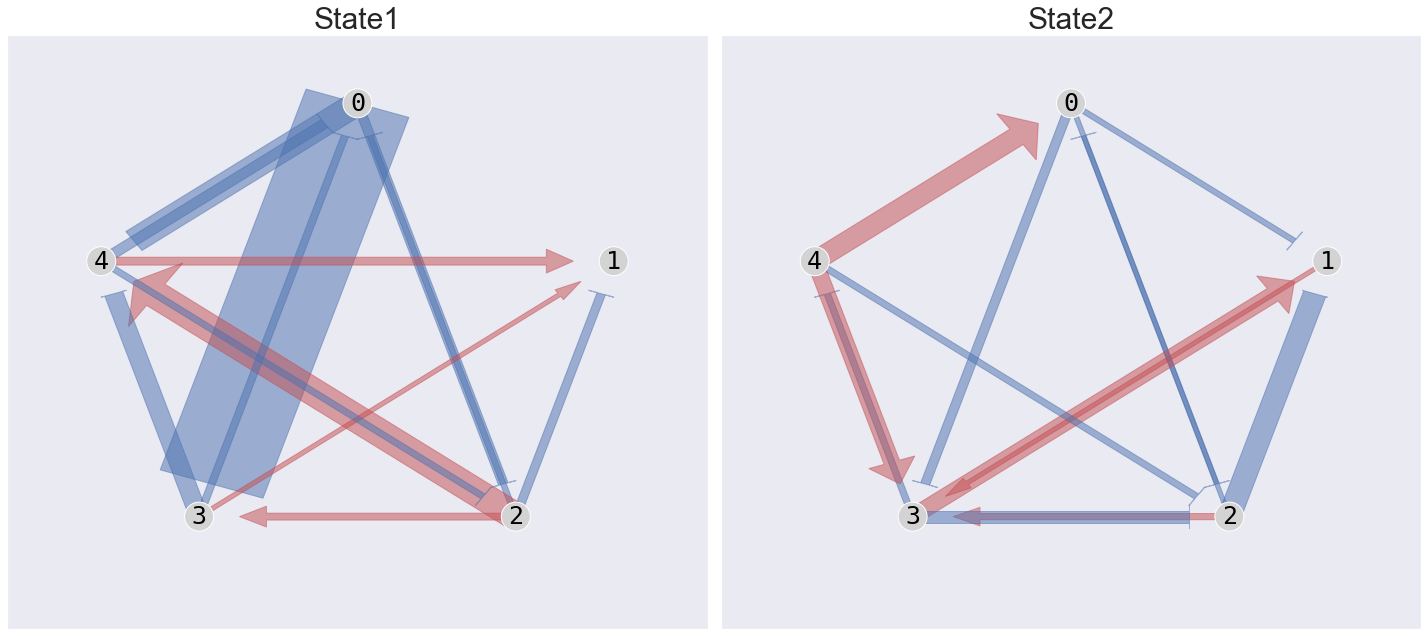

In [10]:
obj.plot()

These figures are saved in the directory path determined by the output_path option, that is, ../output in this case.

## Reproducing the results of the paper

The following shell script Download the dataset used in the paper:

In [5]:
%%bash
mkdir -p ../data/bucci_et_al
curl -o ../data/bucci_et_al/metadata.tsv https://bitbucket.org/MDSINE/mdsine/raw/a5384a34f4c75402aee9bdb8b90db3d70052ac73/data_diet/metadata.txt
curl -o ../data/bucci_et_al/x.tsv https://bitbucket.org/MDSINE/mdsine/raw/a5384a34f4c75402aee9bdb8b90db3d70052ac73/data_diet/counts.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6807  100  6807    0     0   7447      0 --:--:-- --:--:-- --:--:--  7447
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23483  100 23483    0     0  25223      0 --:--:-- --:--:-- --:--:-- 25196


This dataset is from the following paper:

>Bucci, Vanni, et al. "MDSINE: Microbial Dynamical Systems INference Engine for microbiome time-series analyses." Genome biology 17.1 (2016): 1-17.

In [2]:
qmps = pd.read_csv('../data/bucci_et_al/x.tsv', delimiter='\t', index_col=0)
qmps.columns = qmps.columns.astype(str)

In [3]:
metadata = pd.read_csv('../data/bucci_et_al/metadata.tsv', delimiter='\t', index_col=0)
metadata.index = metadata.index.astype(str)
metadata = metadata[['subjectID', 'measurementID']]
# changing column names
metadata.columns = ['subjectID', 'timepoint']

It will take hours with 10000 initialization on 100 jobs (same as the paper). 

So performing the commands below on a lap-top PC is not recommended.

In [5]:
# Rewrite 'False' to 'True' to perform Umibato on the same condition as the paper.
is_performed = False

In [6]:
if is_performed:
    obj = Umibato(k_min=1, k_max=15, k_step=1,
                  n_init=10000, n_jobs=100,
                  x_standardization=True,
                  est_y_var=True,
                  max_iter=100, tol=1e-4,
                  output_path='../output/bucci_et_al')
    obj.fit(qmps, metadata)
    obj.plot()

Next, measure the GPR and CTRHMM time.

Here, you perform CTRHMM estimation 10 times and compute an average elapsed time.

You can measure them using the following code:

In [4]:
import time

n_init = 10
obj = Umibato(k_min=1, k_max=15, k_step=1,
              n_init=n_init, n_jobs=1,
              x_standardization=True,
              est_y_var=True,
              max_iter=100, tol=1e-4,
              output_path='../output/bucci_et_al')

# internal method for estimation of growth rate and interaction
start = time.time()
obj._estimate_growthrates(qmps, metadata)
elapsed_time = time.time() - start
print ('elapsed_time of GPR: {} [sec]'.format(elapsed_time))
start = time.time()
obj._estimate_interactions()
elapsed_time = time.time() - start
print ('elapsed_time of CTRHMM: {} [sec]'.format(elapsed_time / n_init))

Fitting Gaussian process regression...



elapsed_time of GPR: 7.85953164100647 [sec]
Fitting continuous-time regression hidden Markov model...



elapsed_time of CTRHMM: 24.27695722579956 [sec]
